<a href="https://colab.research.google.com/github/YinkaOlu/MachineLearningRepo/blob/main/jupyter/FreeFallConverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Freefall Final Velocity Predictor

### Using Tensorflow to predict final velocity speed of a free fall

Initial step is to import the necessary libraries to build the regression model. This includes importing Tensorflow and numpy

In [1]:
import tensorflow as tf
import numpy as np

The following steps involve creating the training data that will be used to train the regression model. We already know the formula for freefall final speed: Final velocity = (gravitational acceleration) * (fall duration) + initial speed. Using this formula we can populate some training data. Our input will be a Duple representing initial velocity and fall duration. Output will be final velocity. It will be up to our model to determine the gravitational accelration.

In [2]:
input = np.array([[0, 1], [35, 5], [60, 6], [100, 10], [155, 5], [220, 20], [750, 50], [925, 25]], dtype=float)
output = np.array([9.807, 84.03, 118.84, 198.07, 204.03, 416.1, 1240.3, 1170.2], dtype=float)

Now that we have the training data, the model construction starts. The initial layer of the model will be a dense layer. The input shape will be 2 (to represent the 2 data points, initial speed and fall duration).

In [3]:
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[2])

model = tf.keras.Sequential([layer_1])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.9))

Now we train/fit our model with the training data above calculated values above.

In [4]:
history = model.fit(input, output, epochs=500, verbose=False)

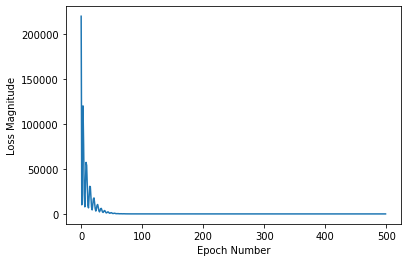

In [5]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [6]:
prediction = model.predict([[10,1]])
print(prediction)

print("These are the layer variables: {}".format(layer_1.get_weights()))

1/1 [==============================] - 0s 89ms/step
[[19.819284]]
These are the layer variables: [array([[1.000091],
       [9.804131]], dtype=float32), array([0.01424461], dtype=float32)]


The above prediction matches the expected value. The weight also matches the gravitational acceleration of earth, which is also expected.

---

